In [5]:
from infopath.model_loader import load_model_and_optimizer
from infopath.config import load_training_opt
import utils.display as display
import numpy as np
import matplotlib.pyplot as plt
import torch 
from utils.signature import lead_matrix

%load_ext autoreload
%autoreload 2

log_path = "../log_dir/trained_models/main_model/"
opt = load_training_opt(log_path)
opt.log_path = log_path
opt.device = "cpu"
model = load_model_and_optimizer(opt, reload=True, last_best="last")[0]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


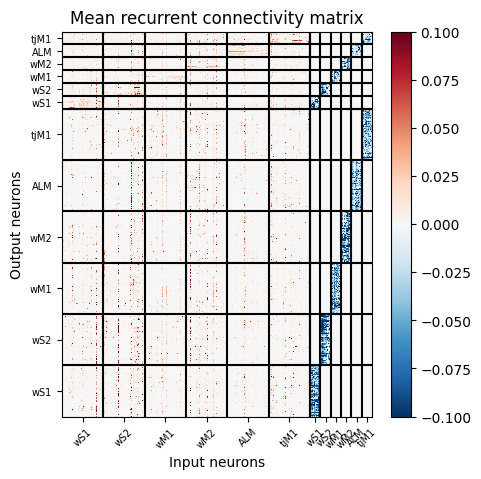

In [3]:
# Plot the mean recurrent connectivity matrix 
w_rec = model.rsnn._w_rec.detach().mean(0)
# Here all weights are positive, because the sign is calculated when we compute the currents.
#   That's why we multiply by -1 to have inhibitory weights in blue.
sign_mask = torch.ones(w_rec.shape)
sign_mask[:, -model.rsnn.inhibitory:] = -1 
w_rec = w_rec * sign_mask

w_rec = w_rec.numpy()
plt.figure(figsize=(5, 5))
plt.pcolormesh(w_rec, cmap="RdBu_r", vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.title("Mean recurrent connectivity matrix")
plt.xlabel("Input neurons")
plt.ylabel("Output neurons")
# lines separate the different populations, first 1200 neurons are excitatory and last 300 are inhibitory
for i in range(200, 1400, 200):
    plt.axvline(i, color="k")
    plt.axhline(i, color="k")
for i in range(1200, 1500, 50):
    plt.axvline(i, color="k")
    plt.axhline(i, color="k")
# put the name of areas as a x label on the plot {wS1, wS2, wM1, wM2, ALM, tjM1}
xticks = [100, 300, 500, 700, 900, 1100, 1225, 1275, 1325, 1375, 1425, 1475]
xlabels = ["wS1", "wS2", "wM1", "wM2", "ALM", "tjM1"] * 2
plt.xticks(xticks, xlabels, rotation=45, fontsize=7)
plt.yticks(xticks, xlabels, fontsize=7)
plt.savefig("weights.png", dpi=300, bbox_inches="tight")

In [6]:
with torch.no_grad():
    stims = torch.ones(10) # binary vector of conditions (absence or presence of whisker stimulation)
    spikes, voltages, jaw, state, in_spikes = model(stims) # generation of the input spikes and simulation of the RSNN

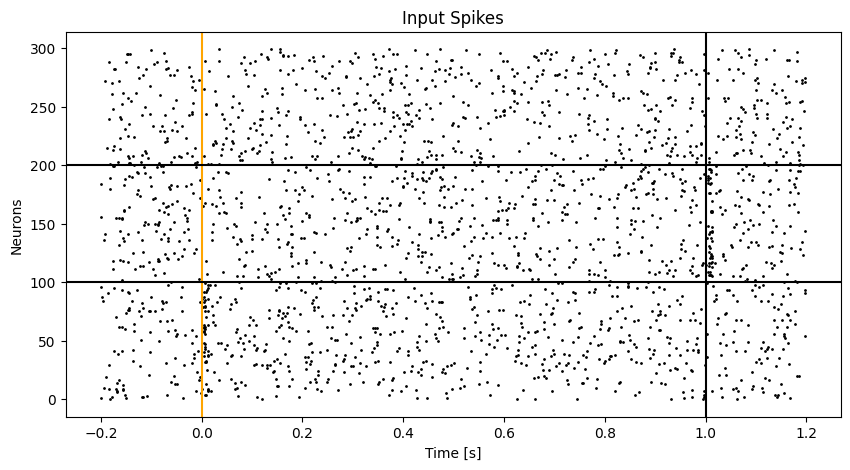

In [23]:
plt.figure(figsize=(10, 5))
sptms, sptns = torch.where(in_spikes[:,0] == 1) # indices of the spikes
plt.scatter(sptms*0.002-0.2, sptns, s=1, c="k")
plt.xlabel("Time [s]")
plt.ylabel("Neurons")
plt.title("Input Spikes")
plt.axvline(0, color="orange")
plt.axvline(1, color="k")
for k in range(100, 300, 100):
    plt.axhline(k, color="k")

In [19]:
model.rsnn.n_exc_inp

240

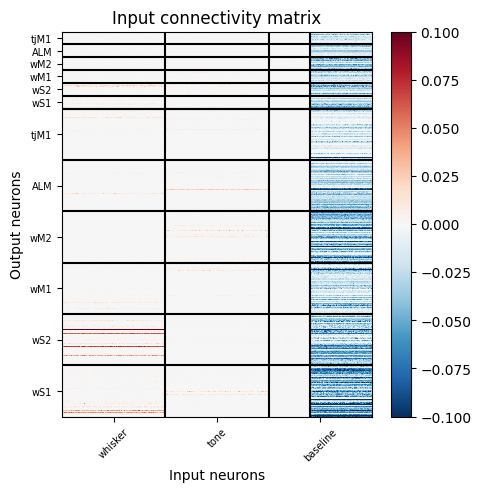

In [25]:
w_in = model.rsnn._w_in.detach()
sign_mask = torch.ones(w_in.shape)
sign_mask[:, model.rsnn.n_exc_inp:] = -1 
w_in = w_in * sign_mask
w_in = w_in.numpy()

plt.figure(figsize=(5, 5))
plt.pcolormesh(w_in, cmap="RdBu_r", vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.title("Input connectivity matrix")
plt.xlabel("Input neurons")
plt.ylabel("Output neurons")
# lines separate the different populations, first 1200 neurons are excitatory and last 300 are inhibitory
for i in range(200, 1400, 200):
    plt.axhline(i, color="k")
for i in range(1200, 1500, 50):
    plt.axhline(i, color="k")
plt.axvline(model.rsnn.n_exc_inp, color="k")
for k in range(100, 300, 100):
    plt.axvline(k, color="k")
# put the name of areas as a x label on the plot {wS1, wS2, wM1, wM2, ALM, tjM1}
yticks = [100, 300, 500, 700, 900, 1100, 1225, 1275, 1325, 1375, 1425, 1475]
ylabels = ["wS1", "wS2", "wM1", "wM2", "ALM", "tjM1"] * 2

xticks = [50, 150, 250]
xlabels = ["whisker", "tone", "baseline"]

_ = plt.xticks(xticks, xlabels, rotation=45, fontsize=7)
_ = plt.yticks(yticks, ylabels, fontsize=7)

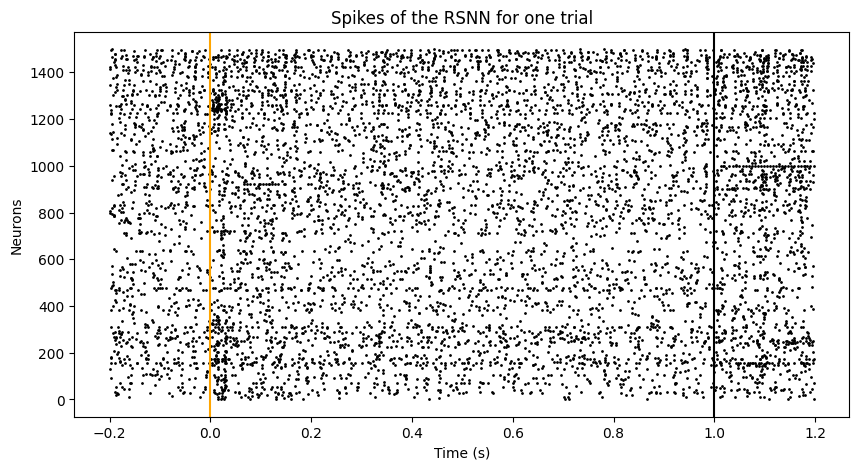

In [6]:
# here we plot the spikes of the neurons of the RSNN for one trial
plt.figure(figsize=(10, 5))
time = torch.arange(0, spikes.shape[1])*0.002 # time vector
sptms, sptns = torch.where(spikes[:,0] == 1) # indices of the spikes
plt.scatter(sptms*0.002-0.2, sptns, s=1, c="k")
plt.xlabel("Time (s)")
plt.ylabel("Neurons")
plt.title("Spikes of the RSNN for one trial")
plt.axvline(0, color="orange")
plt.axvline(1, color="k")

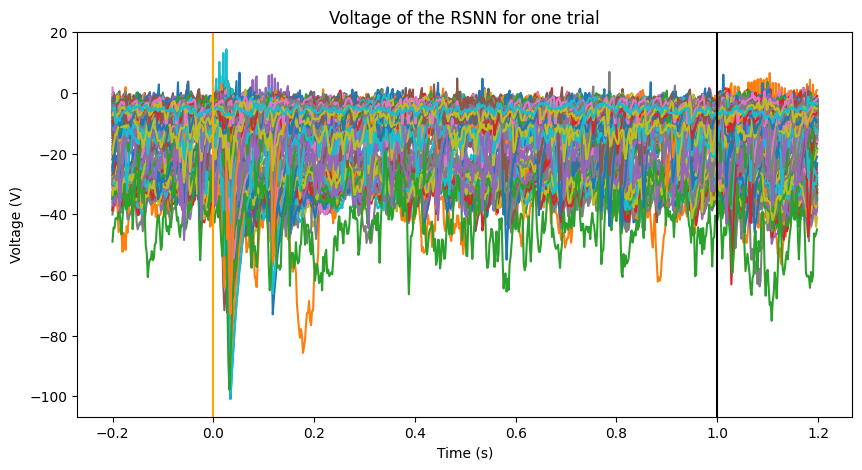

In [7]:
plt.figure(figsize=(10, 5))
time = torch.arange(0, spikes.shape[0])*0.002 -0.2 # time vector
plt.plot(time, voltages[:,0])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV)")
plt.title("Voltage of the RSNN for one trial")
plt.axvline(0, color="orange")
plt.axvline(1, color="k")

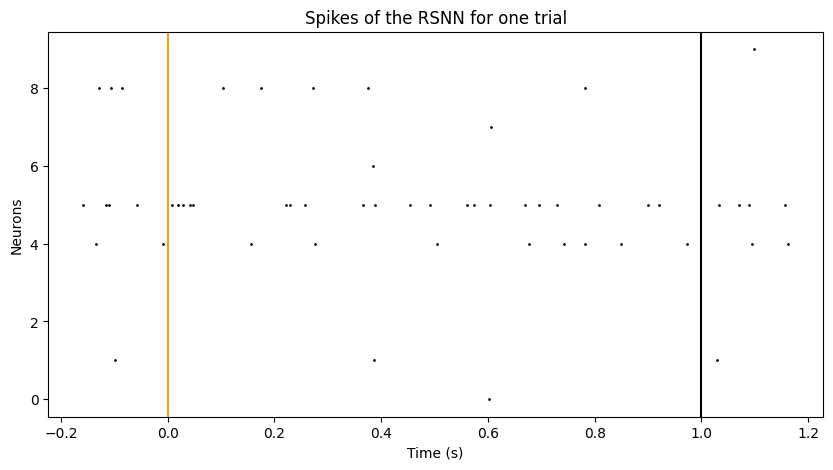

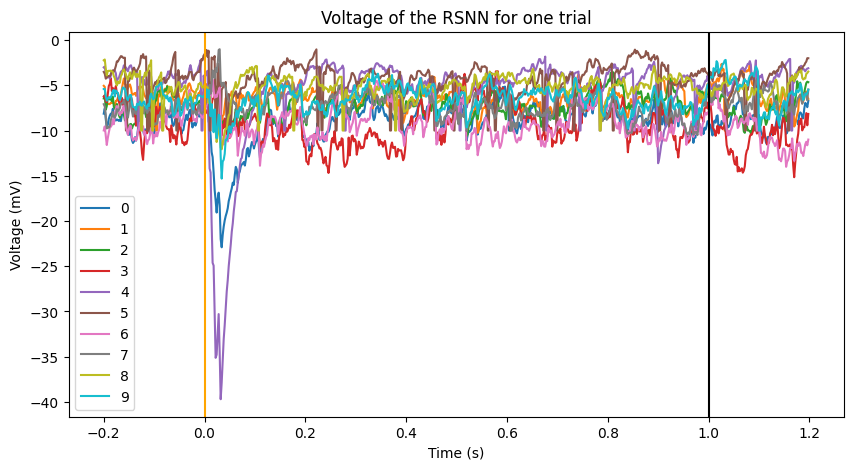

In [14]:
displ_num = 10
idx_start = 100

plt.figure(figsize=(10, 5))
sptms, sptns = torch.where(spikes[:,0,idx_start:idx_start+displ_num] == 1) # indices of the spikes
plt.scatter(sptms*0.002-0.2, sptns, s=1, c="k")
plt.xlabel("Time (s)")
plt.ylabel("Neurons")
plt.title("Spikes of the RSNN for one trial")
plt.axvline(0, color="orange")
plt.axvline(1, color="k")

plt.figure(figsize=(10, 5))
time = torch.arange(0, spikes.shape[0]) * 0.002 - 0.2  # time vector
plt.plot(time, voltages[:, 0, idx_start:idx_start+displ_num], label=range(displ_num))
plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV)")
plt.title("Voltage of the RSNN for one trial")
plt.axvline(0, color="orange")
plt.axvline(1, color="k")
plt.legend()

In [15]:
print(model.rsnn.excitatory_index[idx_start:idx_start+displ_num])
print(model.rsnn.area_index[idx_start:idx_start+displ_num])

tensor([True, True, True, True, True, True, True, True, True, True])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [16]:
model.rsnn.v_rest[idx_start:idx_start+displ_num]

tensor([0.0868, 0.0879, 0.0857, 0.0740, 0.0885, 0.0872, 0.0825, 0.0848, 0.0869,
        0.0868], grad_fn=<SliceBackward0>)

In [17]:
model.rsnn.thr0

0.1

In [18]:
model.rsnn.v_rest0

0

In [19]:
voltages.shape

torch.Size([700, 10, 1500])

In [24]:
voltages[:,0,idx_start:idx_start+displ_num].max(0).values

tensor([-4.8899, -2.4769, -3.5159, -3.4472, -1.8251, -1.0253, -4.2237, -1.0094,
        -2.1460, -2.1934])

In [25]:
(np.tile((model.rsnn.thr0 - model.rsnn.v_rest.detach().numpy()), (700, 10, 1)) * spikes.numpy()).max()

np.float32(0.19998142)

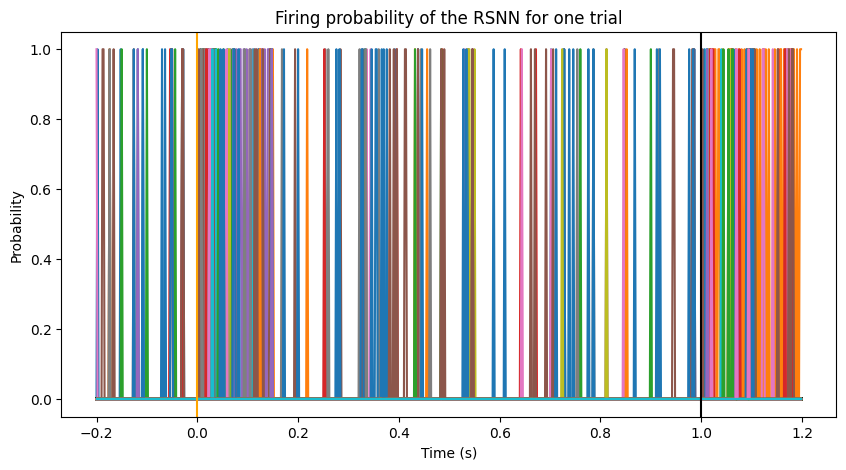

In [26]:
plt.figure(figsize=(10, 5))
logits = voltages
time = torch.arange(0, spikes.shape[0]) * 0.002 - 0.2  # time vector
rates = model.rsnn.spike_fun(logits)
plt.plot(time, rates[:, 0])
plt.xlabel("Time (s)")
plt.ylabel("Probability")
plt.title("Firing probability of the RSNN for one trial")
plt.axvline(0, color="orange")
plt.axvline(1, color="k")

In [27]:
max_rate = rates.max(axis=0)[0]
print((max_rate[0]>0).sum()/1500)

tensor(0.0687)


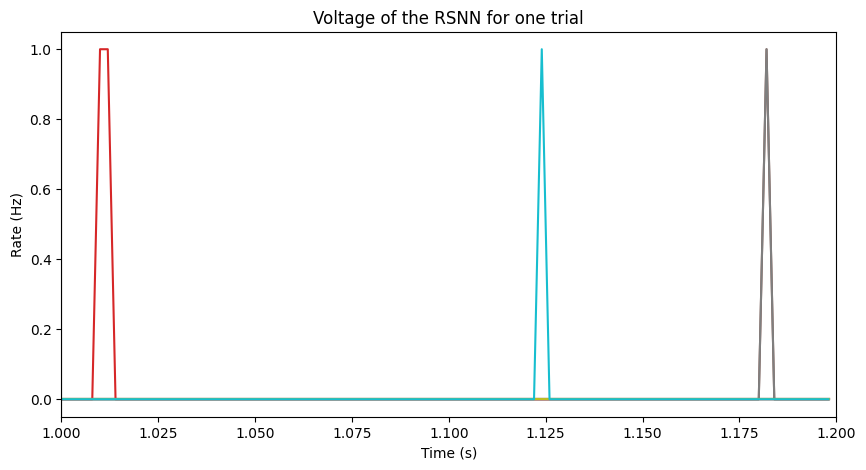

In [32]:
plt.figure(figsize=(10, 5))
time = torch.arange(0, spikes.shape[0]) * 0.002 - 0.2  # time vector
plt.plot(time, rates[:, 0, max_rate[0]>0][:,:10])
plt.xlabel("Time (s)")
plt.xlim(1, 1.2)
plt.ylabel("Rate (Hz)")
plt.title("Voltage of the RSNN for one trial")
plt.axvline(0, color="orange")
plt.axvline(1, color="k")

In [33]:
max_rate[0].shape

torch.Size([1500])

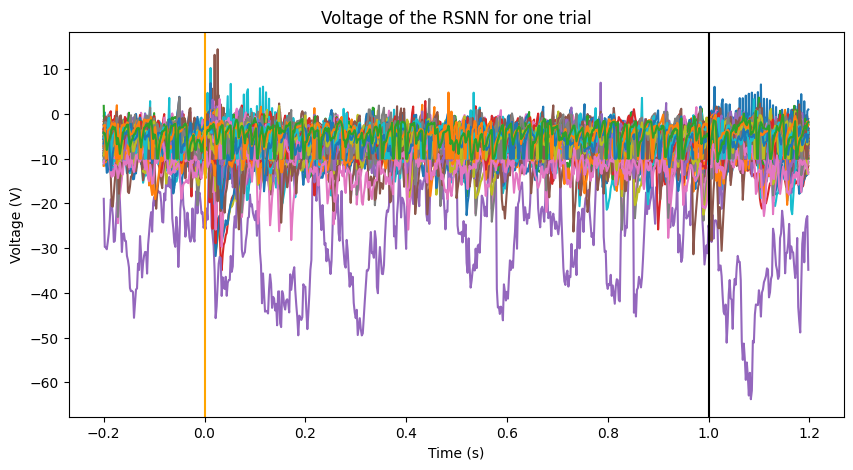

In [34]:
plt.figure(figsize=(10, 5))
time = torch.arange(0, spikes.shape[0]) * 0.002 - 0.2  # time vector
plt.plot(time, voltages[:, 0, max_rate[0]>0])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Voltage of the RSNN for one trial")
plt.axvline(0, color="orange")
plt.axvline(1, color="k")

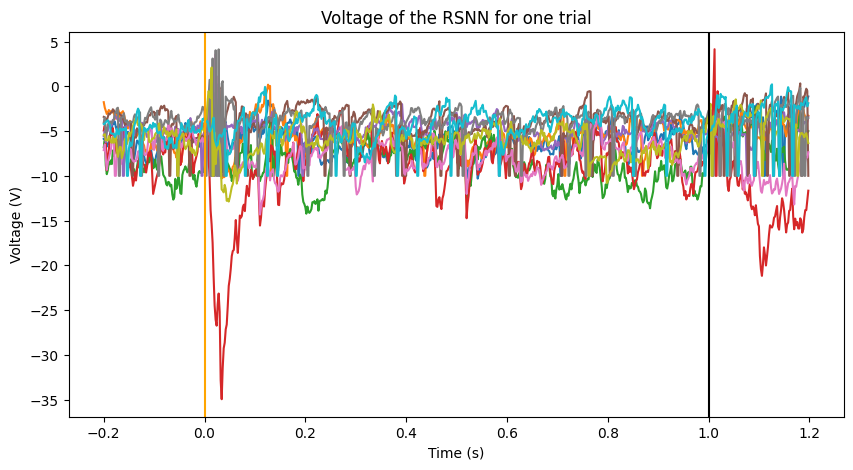

In [35]:
plt.figure(figsize=(10, 5))
time = torch.arange(0, spikes.shape[0]) * 0.002 - 0.2  # time vector
plt.plot(time, voltages[:, 0, max_rate[0]>0][:, :10])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Voltage of the RSNN for one trial")
plt.axvline(0, color="orange")
plt.axvline(1, color="k")

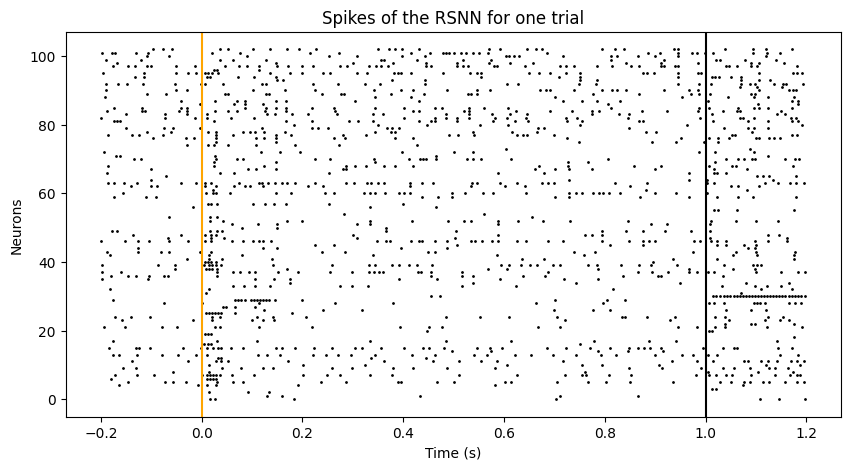

In [36]:
plt.figure(figsize=(10, 5))
sptms, sptns = torch.where(spikes[:, 0, max_rate[0] > 0] == 1)  # indices of the spikes
plt.scatter(sptms * 0.002 - 0.2, sptns, s=1, c="k")
plt.xlabel("Time (s)")
plt.ylabel("Neurons")
plt.title("Spikes of the RSNN for one trial")
plt.axvline(0, color="orange")
plt.axvline(1, color="k")

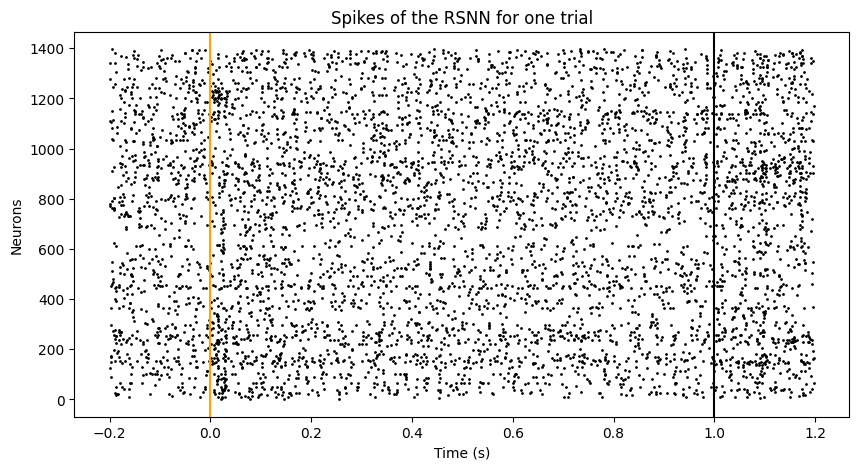

In [37]:
plt.figure(figsize=(10, 5))
sptms, sptns = torch.where(spikes[:, 0, max_rate[0] == 0] == 1)  # indices of the spikes
plt.scatter(sptms * 0.002 - 0.2, sptns, s=1, c="k")
plt.xlabel("Time (s)")
plt.ylabel("Neurons")
plt.title("Spikes of the RSNN for one trial")
plt.axvline(0, color="orange")
plt.axvline(1, color="k")

In [38]:
window = 50
window_func = torch.nn.AvgPool1d(
            window,
            1,
            padding=int(window//2),
            count_include_pad=False,
        )
empirical_rate = window_func(spikes[:, 0].permute(1, 0)).permute(1, 0)[1:]
empirical_rate.shape

torch.Size([700, 1500])

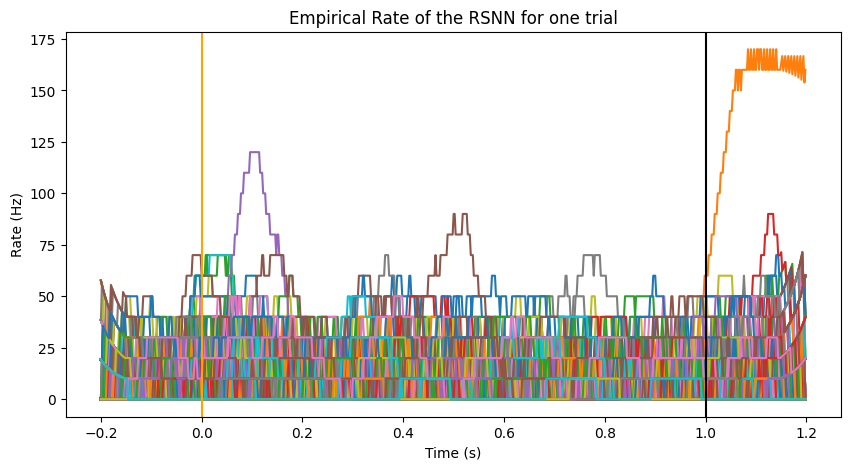

In [39]:
plt.figure(figsize=(10, 5))
time = torch.arange(0, spikes.shape[0]) * 0.002 - 0.2  # time vector
plt.plot(time, empirical_rate/0.002)
plt.xlabel("Time (s)")
plt.ylabel("Rate (Hz)")
plt.title("Empirical Rate of the RSNN for one trial")
plt.axvline(0, color="orange")
plt.axvline(1, color="k")

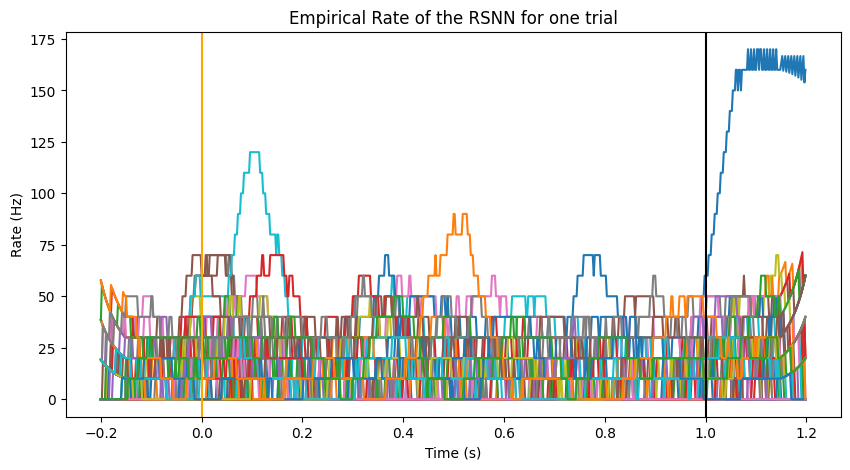

In [40]:
plt.figure(figsize=(10, 5))
time = torch.arange(0, spikes.shape[0]) * 0.002 - 0.2  # time vector
plt.plot(time, empirical_rate[:, max_rate[0]>0]/0.002)
plt.xlabel("Time (s)")
plt.ylabel("Rate (Hz)")
plt.title("Empirical Rate of the RSNN for one trial")
plt.axvline(0, color="orange")
plt.axvline(1, color="k")

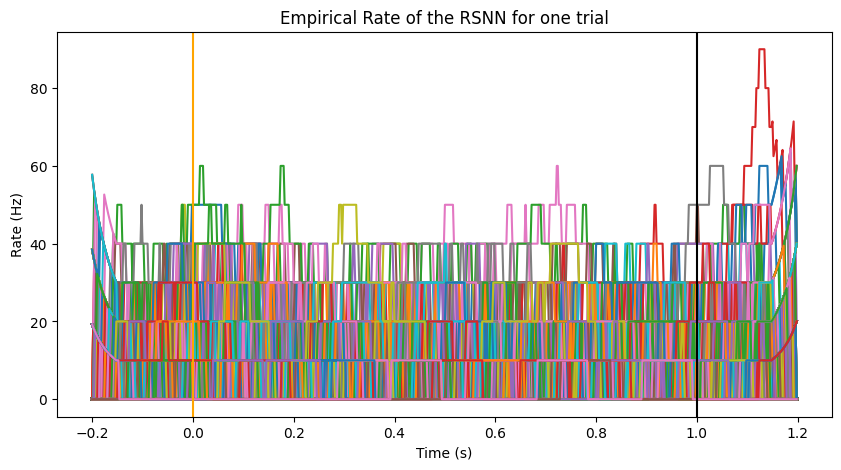

In [41]:
plt.figure(figsize=(10, 5))
time = torch.arange(0, spikes.shape[0]) * 0.002 - 0.2  # time vector
plt.plot(time, empirical_rate[:, max_rate[0]==0]/0.002)
plt.xlabel("Time (s)")
plt.ylabel("Rate (Hz)")
plt.title("Empirical Rate of the RSNN for one trial")
plt.axvline(0, color="orange")
plt.axvline(1, color="k")

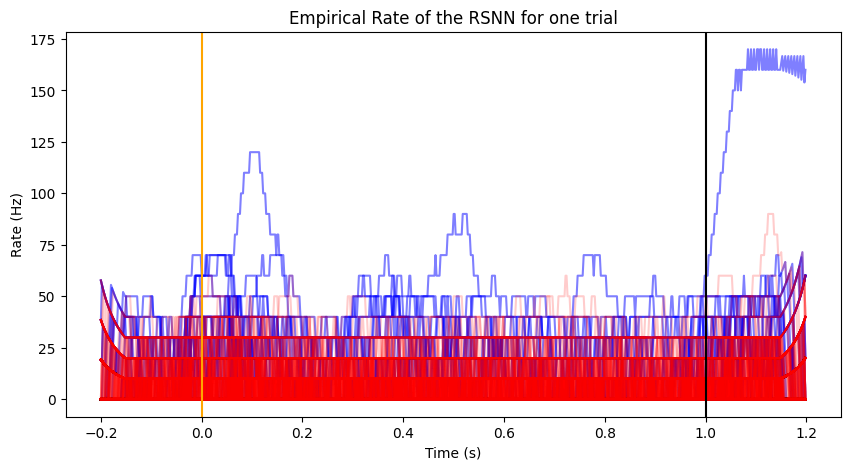

In [42]:
plt.figure(figsize=(10, 5))
time = torch.arange(0, spikes.shape[0]) * 0.002 - 0.2  # time vector
plt.plot(time, empirical_rate[:, max_rate[0] > 0] / 0.002, color='b', label='non-zero rate', alpha=0.5)
plt.plot(time, empirical_rate[:, max_rate[0] == 0] / 0.002, color='r', label='zero rate', alpha=0.2)
plt.xlabel("Time (s)")
plt.ylabel("Rate (Hz)")
plt.title("Empirical Rate of the RSNN for one trial")
plt.axvline(0, color="orange")
plt.axvline(1, color="k")